In [1]:
import tensorflow as tf
import numpy as np

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

x = np.array([
    [100, 105.4, 108.3, 111.1, 113, 114.7],
    [11, 11.8, 12.3, 12.8, 13.1, 13.6],
    [55, 56.3, 57, 58, 59.5, 60.4]
])

y = np.array([4000, 4200.34, 4700, 5300, 5800, 6400])

W = tf.Variable(tf.random.normal((len(x), len(x[0]))))
b = tf.Variable(tf.random.normal((len(y),)))

optimizer = tf.optimizers.Adam(0.10)

loss = []
epochs = []

for i in range(1000):
    with tf.GradientTape() as t:
        prediction = W * x + b
        current_loss = tf.reduce_sum(tf.square(prediction - y))
    grads = t.gradient(current_loss, [W,b])
    optimizer.apply_gradients(zip(grads,[W,b]))
    
    if (i+1)%100==0:
        epochs.append(i)
        loss.append(current_loss)
    

TensorFlow version: 2.0.0
Eager execution: True


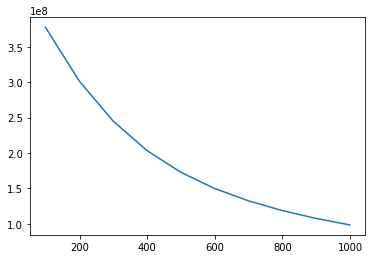

In [3]:
import matplotlib.pyplot as plt
plt.plot(epochs,loss)